# <center> Module 6c - Regression and Statsmodels Calculations
## <center> ENGR 581A5: Design and Analysis of Engineering Experiments
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="600" /> 
### <center> Instructor: Dr. Jeremy Daily

In [1]:
# Use pandas data frames to work with the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f, probplot

In [2]:
#Example: Montgomery Problem 10.7 Horsepower,RPM,Octane,Compression
dataframe = pd.DataFrame(  [[225,2000,90,100],
                            [212,1800,94,95],
                            [229,2400,88,110],
                            [222,1900,91,96],
                            [219,1600,86,100],
                            [278,2500,96,110],
                            [246,3000,94,98],
                            [237,3200,90,100],
                            [233,2800,88,105],
                            [224,3400,86,97],
                            [223,1800,90,100],
                            [230,2500,89,104]],columns=['y','rpm','x1','x2'])
dataframe

,y,rpm,x1,x2
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


Let's assume a linear model:
$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1^2+\beta_4x_2^2+\beta_5x_1x_2+\epsilon$$ 

Notice this is linear in the parameters, even though is is a multi-variate quadratic function.

In [3]:
x1 = dataframe['x1']
x2 = dataframe['x2']
X = np.array([np.ones(np.shape(x1)),
              x1,
              x2,
              x1**2,
              x2**2,
              x1*x2]).transpose()
X

array([[1.0000e+00, 9.0000e+01, 1.0000e+02, 8.1000e+03, 1.0000e+04,
        9.0000e+03],
       [1.0000e+00, 9.4000e+01, 9.5000e+01, 8.8360e+03, 9.0250e+03,
        8.9300e+03],
       [1.0000e+00, 8.8000e+01, 1.1000e+02, 7.7440e+03, 1.2100e+04,
        9.6800e+03],
       [1.0000e+00, 9.1000e+01, 9.6000e+01, 8.2810e+03, 9.2160e+03,
        8.7360e+03],
       [1.0000e+00, 8.6000e+01, 1.0000e+02, 7.3960e+03, 1.0000e+04,
        8.6000e+03],
       [1.0000e+00, 9.6000e+01, 1.1000e+02, 9.2160e+03, 1.2100e+04,
        1.0560e+04],
       [1.0000e+00, 9.4000e+01, 9.8000e+01, 8.8360e+03, 9.6040e+03,
        9.2120e+03],
       [1.0000e+00, 9.0000e+01, 1.0000e+02, 8.1000e+03, 1.0000e+04,
        9.0000e+03],
       [1.0000e+00, 8.8000e+01, 1.0500e+02, 7.7440e+03, 1.1025e+04,
        9.2400e+03],
       [1.0000e+00, 8.6000e+01, 9.7000e+01, 7.3960e+03, 9.4090e+03,
        8.3420e+03],
       [1.0000e+00, 9.0000e+01, 1.0000e+02, 8.1000e+03, 1.0000e+04,
        9.0000e+03],
       [1.0000e+00, 8

In [4]:
Y = np.array([dataframe['y']]).transpose()
Y

array([[225],
       [212],
       [229],
       [222],
       [219],
       [278],
       [246],
       [237],
       [233],
       [224],
       [223],
       [230]], dtype=int64)

In [5]:
#Start calculating the pseudo inverse
np.dot(X.transpose(),X)

array([[1.20000000e+01, 1.08200000e+03, 1.21500000e+03, 9.76700000e+04,
        1.23295000e+05, 1.09556000e+05],
       [1.08200000e+03, 9.76700000e+04, 1.09556000e+05, 8.82650000e+06,
        1.11181800e+07, 9.88984000e+06],
       [1.21500000e+03, 1.09556000e+05, 1.23295000e+05, 9.88984000e+06,
        1.25404650e+07, 1.11181800e+07],
       [9.76700000e+04, 8.82650000e+06, 9.88984000e+06, 7.98572354e+08,
        1.00373964e+09, 8.93802776e+08],
       [1.23295000e+05, 1.11181800e+07, 1.25404650e+07, 1.00373964e+09,
        1.27850786e+09, 1.13095405e+09],
       [1.09556000e+05, 9.88984000e+06, 1.11181800e+07, 8.93802776e+08,
        1.13095405e+09, 1.00373964e+09]])

In [6]:
#Compute the determinant
np.linalg.det(np.dot(X.transpose(),X))

2575459374365918.5

In [7]:
# Compute the rank of the matrix. If this doesn't equal the number of columns, then it is rank deficient
np.linalg.matrix_rank(X)

6

In [8]:
#Compare the rank to the shape. The last numbers should match
np.shape(X)

(12, 6)

In [9]:
XTXinv = np.linalg.inv(np.dot(X.transpose(),X))
XTXinv

array([[ 7.61931273e+04, -1.24046009e+03, -3.80033366e+02,
         6.38447249e+00,  1.50632706e+00,  7.33029749e-01],
       [-1.24046009e+03,  4.77818869e+01, -1.80006946e+01,
        -3.04242559e-01,  5.63628664e-02,  7.14016072e-02],
       [-3.80033366e+02, -1.80006946e+01,  2.31134246e+01,
         1.43900635e-01, -7.83687295e-02, -7.70196196e-02],
       [ 6.38447250e+00, -3.04242559e-01,  1.43900635e-01,
         2.06790638e-03, -3.99124861e-04, -6.84807852e-04],
       [ 1.50632706e+00,  5.63628664e-02, -7.83687295e-02,
        -3.99124861e-04,  3.16119654e-04,  1.47541100e-04],
       [ 7.33029749e-01,  7.14016072e-02, -7.70196196e-02,
        -6.84807852e-04,  1.47541100e-04,  5.13162628e-04]])

In [10]:
#Inversion is now possible, so we can calculate the parameters for least-squares
beta = np.dot(np.dot(XTXinv,np.transpose(X)),Y)
beta

array([[ 2.90031521e+03],
       [-7.24090613e+01],
       [ 7.19465597e+00],
       [ 2.37411544e-01],
       [-1.68223761e-01],
       [ 3.20680547e-01]])

In [11]:
# Determine the expected observations based on the model
y_hat = np.dot(X,beta)
y_hat

array([[229.88610177],
       [220.58200238],
       [226.92514707],
       [218.89767073],
       [224.11240118],
       [279.32133082],
       [235.19632659],
       [229.88610177],
       [230.69297022],
       [219.21309524],
       [229.88610177],
       [233.40075116]])

In [12]:
# Determine the residuals
resid = Y - y_hat
resid

array([[-4.88610177],
       [-8.58200238],
       [ 2.07485293],
       [ 3.10232927],
       [-5.11240118],
       [-1.32133082],
       [10.80367341],
       [ 7.11389823],
       [ 2.30702978],
       [ 4.78690476],
       [-6.88610177],
       [-3.40075116]])

In [13]:
SSE = np.dot(resid.transpose(),resid)
SSE

array([[393.88403486]])

In [14]:
y_bar = Y.mean()
y_bar

231.5

In [15]:
y_ddot = Y.sum()
y_ddot

2778

In [16]:
#Determine the number of samples
n = len(Y) 
n

12

In [17]:
SSR = np.dot((y_hat-y_bar).transpose(),(y_hat-y_bar))
SSR

array([[2817.11596576]])

In [18]:
SSR = np.dot(y_hat.transpose(),y_hat) - y_ddot**2/n
SSR

array([[2817.11629286]])

In [19]:
SST = np.dot(Y.transpose(),Y) - y_ddot**2/n
SST

array([[3211.]])

In [20]:
np.allclose(SST,SSR+SSE)

True

In [21]:
p = len(beta) #regression dof
p

6

In [22]:
dof_resid = n - p 
dof_resid

6

In [23]:
MSR = SSR/(p-1)
MSR

array([[563.42325857]])

In [24]:
MSE = SSE/dof_resid
MSE

array([[65.64733914]])

In [25]:
F_o = MSR/MSE
F_o

array([[8.58257571]])

In [26]:
R_squared = 1 - SSE/SST
R_squared

array([[0.87733291]])

In [27]:
R_squared_adj = 1 - ((n-1)/(n-p))*(1 - R_squared)
R_squared_adj

array([[0.77511033]])

In [28]:
# Covariance matrix
cov = MSE*XTXinv
cov

array([[ 5.00187607e+06, -8.14329042e+04, -2.49481793e+04,
         4.19123631e+02,  9.88863632e+01,  4.81214526e+01],
       [-8.14329043e+04,  3.13675373e+03, -1.18169770e+03,
        -1.99727144e+01,  3.70007220e+00,  4.68732553e+00],
       [-2.49481792e+04, -1.18169770e+03,  1.51733482e+03,
         9.44669377e+00, -5.14469857e+00, -5.05613309e+00],
       [ 4.19123631e+02, -1.99727145e+01,  9.44669377e+00,
         1.35752552e-01, -2.62014851e-02, -4.49558133e-02],
       [ 9.88863631e+01,  3.70007221e+00, -5.14469857e+00,
        -2.62014851e-02,  2.07524141e-02,  9.68568060e-03],
       [ 4.81214525e+01,  4.68732553e+00, -5.05613309e+00,
        -4.49558133e-02,  9.68568061e-03,  3.36877611e-02]])

In [29]:
#Standard errors for the coeffiecients are the diagnonals
std_errs = np.sqrt(np.diag(cov))
std_errs

array([2.23648744e+03, 5.60067294e+01, 3.89529822e+01, 3.68446131e-01,
       1.44056982e-01, 1.83542260e-01])

In [30]:
#Correlation coeffs
rho = np.zeros(np.shape(cov))
for i in range(0,len(std_errs)):
    for j in range(i,len(std_errs)):
        rho[i][j] = cov[i][j]/std_errs[i]/std_errs[j]
        rho[j][i] = cov[i][j]/std_errs[i]/std_errs[j] #symmetric
rho[3,4]

-0.4936482415643485

In [31]:
#Compute the hat matrix that maps observations to fitted values
hat_matrix = np.dot(np.dot(X,XTXinv),X.transpose())
# Test the hat matrix relationship
np.allclose(y_hat, np.dot(hat_matrix,Y))

True

In [32]:
press = ((resid.flatten()/(1-np.diag(hat_matrix)))**2).sum()
press

14536.179534466113

In [33]:
R_squared_press = 1 - press/SST
R_squared_press

array([[-3.52699456]])

Text(0, 0.5, 'Scaled Residual')

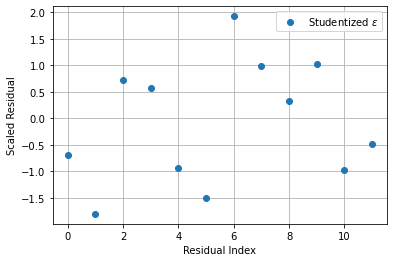

In [34]:
studentized_residuals = resid.flatten() / np.sqrt( MSE[0]*(1 - np.diag(hat_matrix)) )
plt.plot(studentized_residuals,'o',label='Studentized $\epsilon$')
plt.legend()
plt.grid()
plt.xlabel('Residual Index')
plt.ylabel('Scaled Residual')

array([-1.80265719, -1.50092544, -0.96490641, -0.93627277, -0.68465891,
       -0.48239266,  0.33714082,  0.56840348,  0.71825328,  0.99682611,
        1.02598138,  1.92769269])

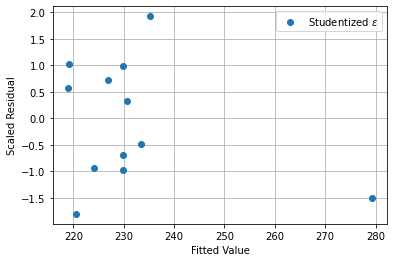

In [35]:
plt.plot(y_hat,studentized_residuals,'o',label='Studentized $\epsilon$')
plt.legend()
plt.grid()
plt.xlabel('Fitted Value')
plt.ylabel('Scaled Residual')
np.sort(studentized_residuals)

Text(0, 0.5, 'Residual Residual')

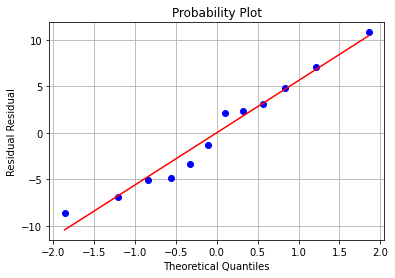

In [36]:
result = probplot(resid.flatten(),sparams=dof_resid,dist='t',plot=plt)
plt.grid()
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residual Residual')

In [37]:
#Compute the estimate of the standard deviation
std_resid = np.sqrt(MSE)
std_resid

array([[8.10230456]])

In [38]:
t_stats = beta.flatten()/std_errs
t_stats

array([ 1.29681712, -1.29286359,  0.18470103,  0.6443589 , -1.16775847,
        1.74717554])

In [39]:
# Two sided test on the parameters
p_values = 2*t.sf(np.abs(t_stats),dof_resid)
p_values

array([0.24232929, 0.24360675, 0.85954842, 0.54317571, 0.28720438,
       0.13120209])

## Compare results to statsmodels
https://www.statsmodels.org/stable/index.html

We'll go through the capabilities in the linear regression of the stats models library and tie it back to our "hand" calculations.

https://www.statsmodels.org/stable/regression.html

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
# Fit regression model 
results = smf.ols('y ~ x1*x2 + pow(x1,2) + pow(x2,2)', data=dataframe).fit()
# Inspect the results
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     8.583
Date:                Thu, 11 Mar 2021   Prob (F-statistic):             0.0105
Time:                        16:38:52   Log-Likelihood:                -37.974
No. Observations:                  12   AIC:                             87.95
Df Residuals:                       6   BIC:                             90.86
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2900.3152   2236.487      1.297      0.242   -2572.172    8372.803
x1           -72.4091     56.007     -1.293      0.244    -209.453      64.634
x2             7.1947     38.953      0.185      0.860     -88.120     102.509
x1:x2          0.3207      0.184      1.747      0.131      -0.128       0.770
pow(x1, 2)     0.2374      0.368      0.644      0.543      -0.664       1.139
pow(x2, 2)    -0.1682      0.144     -1.168      0.287      -0.521       0.184
==============================================================================
Omnibus:                        0.642   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.607
Skew:                           0.235   Prob(JB):                        0.738
Kurtosis:                       2.004   Cond. No.                     1.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
results.fittedvalues

0     229.886102
1     220.582002
2     226.925147
3     218.897671
4     224.112401
5     279.321331
6     235.196327
7     229.886102
8     230.692970
9     219.213095
10    229.886102
11    233.400751
dtype: float64

In [43]:
y_hat

array([[229.88610177],
       [220.58200238],
       [226.92514707],
       [218.89767073],
       [224.11240118],
       [279.32133082],
       [235.19632659],
       [229.88610177],
       [230.69297022],
       [219.21309524],
       [229.88610177],
       [233.40075116]])

In [44]:
np.allclose(y_hat.flatten(),results.fittedvalues)

True

In [45]:
np.log(SSE)

array([[5.97605654]])

### Likelihood
Given a linear model:
$$y=[X]\beta +\epsilon$$
Assume the residuals are distributed as independent guassian noise:
$$ \epsilon \sim N(0,\sigma^2)$$
Theoretical, joint probability density (no correlation):
$$\prod_{i=1}^{n}p(y|x_i,\beta,\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\epsilon_i^2}{2\sigma^2}}$$
If estimated values for the parametersa are used, $\hat{\beta}, s^2$, then the likelihood function is defined:
$$\prod_{i=1}^{n}p(y|x_i,\hat{\beta},s^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi s^2}}e^{-\frac{(y_i - \hat{y}_i)^2}{2s^2}}$$
where $$\hat{y} = [X]\hat{\beta}$$ and $s^2 = SSE/n$ is the population variance used as an estimator. It is much easier to work with the natural log of the likelihood, so
$$ L(\hat{\beta},s^2) = \log\left(\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi s^2}}e^{-\frac{(y_i - \hat{y}_i)^2}{2s^2}}\right)$$
$$ L(\hat{\beta},s^2) = \sum_{i=1}^{n}\log\left(\frac{1}{\sqrt{2\pi s^2}}e^{-\frac{(y_i - \hat{y}_i)^2}{2s^2}}\right)$$
$$ L(\hat{\beta},s^2) = \sum_{i=1}^{n}\log\left(\frac{1}{\sqrt{2\pi s^2}}\right)+\log\left(e^{-\frac{(y_i - \hat{y}_i)^2}{2s^2}}\right)$$
$$ L(\hat{\beta},s^2) = \sum_{i=1}^{n} \left( -\frac{1}{2}(\log 2\pi + 2 \log s) - \frac{(y_i - \hat{y}_i)^2}{2s^2}\right)$$
$$ L(\hat{\beta},s^2) =   -\frac{n}{2}\log 2\pi - n \log s - \frac{1}{2s^2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$
This is the log-liklihood function. If the estimate for $s^2 = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$, then
$$ L(\hat{\beta},s^2) =   -\frac{n}{2}\log 2\pi - n \log s - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{2\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}$$
$$ L(\hat{\beta},s^2) =   -\frac{n}{2}\log 2\pi - n \log s - \frac{n}{2}$$

In [46]:
s = np.sqrt(SSE/n)[0][0]
llf = -n/2 * np.log(2*np.pi) - n*np.log(s) - n/2
llf

-37.97416172905245

In [47]:
results.llf

-37.97416172905234

In [48]:
results.aic

87.94832345810468

In [49]:
-2*results.llf + 2*(n - p)

87.94832345810468

In [50]:
results.bic

90.85776335683269

In [51]:
-2*results.llf + np.log(n)*(n - p)

90.85776335683269

In [52]:
# The standard errors of the parameter estimates
results.bse

Intercept     2236.487439
x1              56.006729
x2              38.952982
x1:x2            0.183542
pow(x1, 2)       0.368446
pow(x2, 2)       0.144057
dtype: float64

In [53]:
std_errs

array([2.23648744e+03, 5.60067294e+01, 3.89529822e+01, 3.68446131e-01,
       1.44056982e-01, 1.83542260e-01])

In [54]:
np.allclose(np.sort(results.bse),np.sort(std_errs))

True

In [55]:
results.HC0_se

Intercept     1350.713178
x1              39.854716
x2              29.559185
x1:x2            0.148823
pow(x1, 2)       0.291643
pow(x2, 2)       0.099584
dtype: float64

In [56]:
S = resid.flatten()**2
cov_hc0 = np.dot(np.dot(XTXinv,X.T),np.dot(np.diag(S), np.dot(X,XTXinv)))
hc0 = np.sqrt(np.diag(cov_hc0))
hc0

array([1.35071318e+03, 3.98547164e+01, 2.95591853e+01, 2.91642898e-01,
       9.95844404e-02, 1.48822570e-01])

In [57]:
np.allclose(np.sort(results.HC0_se),np.sort(hc0))

True

In [58]:
np.allclose(np.sort(results.cov_HC0.flatten()),np.sort(cov_hc0.flatten()))

True

In [59]:
results.HC1_se

Intercept     1910.196896
x1              56.363080
x2              41.803001
x1:x2            0.210467
pow(x1, 2)       0.412445
pow(x2, 2)       0.140834
dtype: float64

In [60]:
S = resid.flatten()**2 * (n / (n - p))
cov_hc1 = np.dot(np.dot(XTXinv,X.T),np.dot(np.diag(S), np.dot(X,XTXinv)))
hc1 = np.sqrt(np.diag(cov_hc1))
hc1

array([1.91019690e+03, 5.63630804e+01, 4.18030007e+01, 4.12445342e-01,
       1.40833666e-01, 2.10466897e-01])

In [61]:
np.allclose(np.sort(results.HC1_se),np.sort(hc1))

True

In [62]:
I = np.eye(len(hat_matrix))
S = resid.flatten()**2 / np.diag((I-hat_matrix))
cov_hc2 = np.dot(np.dot(XTXinv,X.T),np.dot(np.diag(S), np.dot(X,XTXinv)))
hc2 = np.sqrt(np.diag(cov_hc2))
hc2

array([2.37260198e+03, 5.92801529e+01, 4.54122838e+01, 4.18752900e-01,
       1.53008442e-01, 2.48462433e-01])

In [63]:
results.HC2_se

Intercept     2372.601951
x1              59.280153
x2              45.412284
x1:x2            0.248462
pow(x1, 2)       0.418753
pow(x2, 2)       0.153008
dtype: float64

In [64]:
np.allclose(np.sort(results.HC2_se),np.sort(hc2))

True

In [65]:
results.HC3_se

Intercept     12882.931151
x1              176.506628
x2              132.395909
x1:x2             1.015063
pow(x1, 2)        0.704148
pow(x2, 2)        0.295213
dtype: float64

In [66]:
S = resid.flatten()**2 / np.diag((I-hat_matrix))**2
cov_hc3 = np.dot(np.dot(XTXinv,X.T),np.dot(np.diag(S), np.dot(X,XTXinv)))
hc3 = np.sqrt(np.diag(cov_hc3))
hc3

array([1.28829316e+04, 1.76506633e+02, 1.32395913e+02, 7.04147662e-01,
       2.95213198e-01, 1.01506348e+00])

In [67]:
np.allclose(np.sort(results.HC3_se),np.sort(hc3))

True

In [68]:
results.centered_tss

3211.0

In [69]:
SST

array([[3211.]])

In [70]:
results.uncentered_tss

646318.0

In [71]:
np.dot(Y.transpose(),Y)

array([[646318]], dtype=int64)

In [72]:
results.ess

2817.1159651351973

In [73]:
SSR

array([[2817.11629286]])

In [74]:
(vals,vects) = np.linalg.eig(np.dot(X.transpose(),X))
vals

array([3.07440613e+09, 6.63183145e+06, 2.69624945e+03, 1.74234102e+02,
       1.31207466e-05, 2.04931382e-02])

In [75]:
results.eigenvals

array([3.07440613e+09, 6.63183145e+06, 2.69624945e+03, 1.74234102e+02,
       2.04931386e-02, 1.31207384e-05])

In [76]:
results.condition_number

15307401.712950852

In [77]:
cond_matrix = vals.max()/vals.min()
np.sqrt(cond_matrix)

15307396.935416425

In [78]:
# This is the number of digits of accuracy loss in precision
np.log10(cond_matrix)

14.369802688032545

In [79]:
np.allclose(np.sort(vals),np.sort(results.eigenvals))

True

In [80]:
results.ssr

393.88403486480297

In [81]:
SSE

array([[393.88403486]])

In [82]:
results.tvalues

Intercept     1.296817
x1           -1.292864
x2            0.184701
x1:x2         1.747176
pow(x1, 2)    0.644359
pow(x2, 2)   -1.167758
dtype: float64

In [83]:
results.pvalues

Intercept     0.242329
x1            0.243607
x2            0.859548
x1:x2         0.131202
pow(x1, 2)    0.543176
pow(x2, 2)    0.287204
dtype: float64

In [84]:
p_values

array([0.24232929, 0.24360675, 0.85954842, 0.54317571, 0.28720438,
       0.13120209])

In [85]:
results.mse_model

563.4231930270395

In [86]:
MSR

array([[563.42325857]])

In [87]:
results.mse_resid

65.64733914413382

In [88]:
MSE

array([[65.64733914]])

In [89]:
results.mse_total

291.90909090909093

In [90]:
results.nobs

12.0

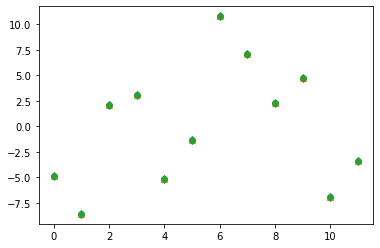

In [91]:
plt.plot(results.wresid,'d')
plt.plot(results.resid,'^')
plt.plot(resid,'o')

In [92]:
results.use_t

True

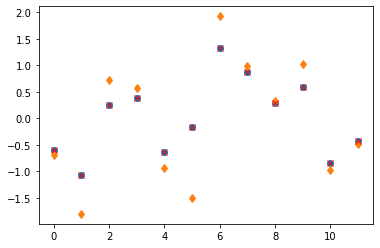

In [93]:
plt.plot(resid/np.sqrt(MSE),'o')
plt.plot(studentized_residuals,'d')
plt.plot(results.resid_pearson,'rx')


In [94]:
f.sf(F_o,p-1,dof_resid)

array([[0.01048318]])

In [95]:
results.f_pvalue

0.010483181925541315

In [96]:
results.scale

65.64733914413382

In [97]:
SSE/(n-p)

array([[65.64733914]])

In [98]:
new_vars = pd.DataFrame()
N=100
new_vars['x1'] = np.ones(N)*dataframe["x1"].mean()
new_vars['x2'] = np.linspace(.9*min(dataframe["x2"]),1.1*max(dataframe["x2"]),N)
new_vars

,x1,x2
0,90.166667,85.500000
1,90.166667,85.858586
2,90.166667,86.217172
3,90.166667,86.575758
4,90.166667,86.934343
...,...,...
95,90.166667,119.565657
96,90.166667,119.924242
97,90.166667,120.282828
98,90.166667,120.641414


In [99]:
new_y = results.predict(new_vars)

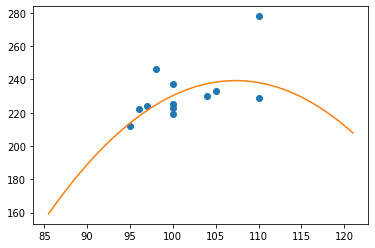

In [100]:
plt.plot(dataframe['x2'],dataframe['y'],'o')
plt.plot(new_vars['x2'],new_y)

In [101]:
results.cov_params()

,Intercept,x1,x2,x1:x2,"pow(x1, 2)","pow(x2, 2)"
Intercept,5.001876e+06,-81432.904243,-24948.179253,48.121453,419.123631,98.886363
x1,-8.143290e+04,3136.753734,-1181.697701,4.687326,-19.972714,3.700072
x2,-2.494818e+04,-1181.697701,1517.334823,-5.056133,9.446694,-5.144699
x1:x2,4.812145e+01,4.687326,-5.056133,0.033688,-0.044956,0.009686
"pow(x1, 2)",4.191236e+02,-19.972714,9.446694,-0.044956,0.135753,-0.026201
"pow(x2, 2)",9.888636e+01,3.700072,-5.144699,0.009686,-0.026201,0.020752


In [102]:
cov

array([[ 5.00187607e+06, -8.14329042e+04, -2.49481793e+04,
         4.19123631e+02,  9.88863632e+01,  4.81214526e+01],
       [-8.14329043e+04,  3.13675373e+03, -1.18169770e+03,
        -1.99727144e+01,  3.70007220e+00,  4.68732553e+00],
       [-2.49481792e+04, -1.18169770e+03,  1.51733482e+03,
         9.44669377e+00, -5.14469857e+00, -5.05613309e+00],
       [ 4.19123631e+02, -1.99727145e+01,  9.44669377e+00,
         1.35752552e-01, -2.62014851e-02, -4.49558133e-02],
       [ 9.88863631e+01,  3.70007221e+00, -5.14469857e+00,
        -2.62014851e-02,  2.07524141e-02,  9.68568060e-03],
       [ 4.81214525e+01,  4.68732553e+00, -5.05613309e+00,
        -4.49558133e-02,  9.68568061e-03,  3.36877611e-02]])

In [103]:
# Fit regression model 
restricted_results = smf.ols('y ~ x1 + x2', data=dataframe).fit()
# Inspect the results
restricted_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     9.071
Date:                Thu, 11 Mar 2021   Prob (F-statistic):            0.00696
Time:                        16:38:53   Log-Likelihood:                -43.941
No. Observations:                  12   AIC:                             93.88
Df Residuals:                       9   BIC:                             95.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -241.7394    113.692     -2.126      0.062    -498.928      15.449
x1             2.9718      1.039      2.861      0.019       0.622       5.322
x2             2.0275      0.655      3.098      0.013       0.547       3.508
==============================================================================
Omnibus:                        0.467   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.519
Skew:                          -0.342   Prob(JB):                        0.771
Kurtosis:                       2.245   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
results.compare_f_test(restricted_results)

(3.406205392979798, 0.0940320673118794, 3.0)

In [105]:
#results.compare_lm_test(restricted_results)

In [106]:
results.compare_lr_test(restricted_results)

(11.932803121134597, 0.007616929409552928, 3.0)

In [107]:
results.conf_int()

,0,1
Intercept,-2572.172408,8372.802821
x1,-209.452591,64.634468
x2,-88.119858,102.509170
x1:x2,-0.128431,0.769792
"pow(x1, 2)",-0.664144,1.138967
"pow(x2, 2)",-0.520718,0.184271


In [108]:
np.eye(p)[1:,:]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [109]:
results.f_test(np.eye(p)[1:,:])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[8.58257471]]), p=0.010483181925578672, df_denom=6, df_num=5>

In [110]:
results.fvalue

8.582574714719208

In [111]:
A = np.eye(p)[1:,:]
A[0,1] = 0
A

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [112]:
results.f_test(A)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[6.87754482]]), p=0.019877288916839885, df_denom=6, df_num=4>

In [113]:
influence = results.get_influence()
influence.summary_frame()

,dfb_Intercept,dfb_x1,dfb_x2,dfb_x1:x2,"dfb_pow(x1, 2)","dfb_pow(x2, 2)",cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.205762,-0.183751,0.003405,-0.135178,0.191315,0.072029,0.022576,-0.684659,0.224183,-0.368041,-0.650950,-0.349921
1,-0.606396,0.613213,-0.102991,1.633281,-0.983955,-0.758866,1.027109,-1.802657,0.654750,-2.482470,-2.430514,-3.347101
2,-0.051503,0.382190,-0.425239,-0.533044,-0.181327,0.878687,0.590416,0.718253,0.872883,1.882152,0.685819,1.797159
3,-0.046100,0.389150,-0.437524,0.298051,-0.411366,0.404173,0.064816,0.568403,0.546220,0.623617,0.533440,0.585257
4,-0.482827,0.751054,-0.423191,0.280102,-0.703674,0.402697,0.175580,-0.936273,0.545820,-1.026392,-0.924929,-1.013956
5,-6.470928,3.192810,3.398374,-5.974262,-1.087833,-1.210764,31.428349,-1.500925,0.988194,-13.732083,-1.733761,-15.862317
6,-0.310068,-1.346602,2.028332,-1.795681,1.660234,-1.670813,0.675084,1.927693,0.521535,2.012586,2.852165,2.977771
7,-0.314892,0.281207,-0.005211,0.206872,-0.292783,-0.110231,0.047855,0.996826,0.224183,0.535847,0.996195,0.535508
8,-0.065388,-0.033526,0.115178,-0.090585,0.053275,-0.098937,0.007615,0.337141,0.286709,0.213746,0.310723,0.196998
9,1.024258,-0.391979,-0.622500,0.541053,0.164512,0.503402,0.353632,1.025981,0.668401,1.456637,1.031425,1.464365


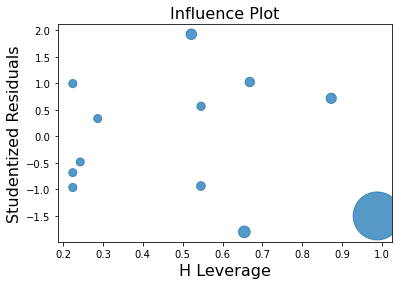

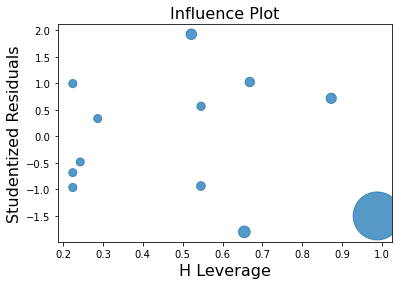

In [114]:
influence.plot_influence()

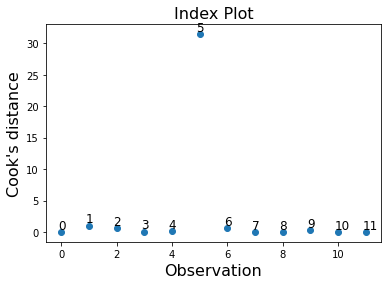

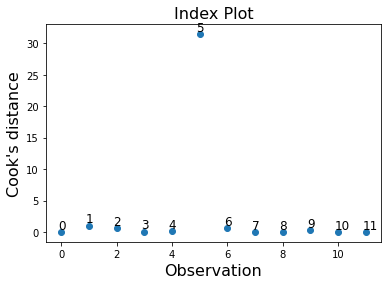

In [115]:
influence.plot_index()

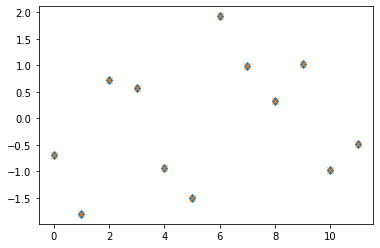

In [116]:
plt.plot(studentized_residuals,'d')
plt.plot(influence.get_resid_studentized_external(),'x')

In [117]:
press

14536.179534466113

In [118]:
(influence.resid_press**2).sum()

14536.178348413738

In [119]:
influence.influence

array([  -1.41190535,  -16.27534534,   14.24758621,    3.73431039,
         -6.14393316, -110.60281182,   11.77618861,    2.05565738,
          0.92731713,    9.64890993,   -1.98983247,   -1.09128924])

In [120]:
influence.resid_press

array([  -6.29800706,  -24.85734766,   16.3224392 ,    6.83663971,
        -11.25633428, -111.92414258,   22.57986208,    9.16955566,
          3.23434697,   14.43581475,   -8.87593419,   -4.49204034])